## FKA122: H1a | Jonatan Haraldsson & Oscar Stommendal - group 19

### Import statements, constants and general functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as K
import pandas as pd

# Latex style
plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=20)
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
# Set ticks on both sides
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

# Constants
k_B = K.Boltzmann
e = K.elementary_charge
k_B /= e
n_atoms = 256


"""--------- FUNCTIONS -----------"""


def read_file(path):
    data = pd.read_csv(path, delimiter=',')
    data = np.asarray(data)
    return data


### Plot $P(T)$

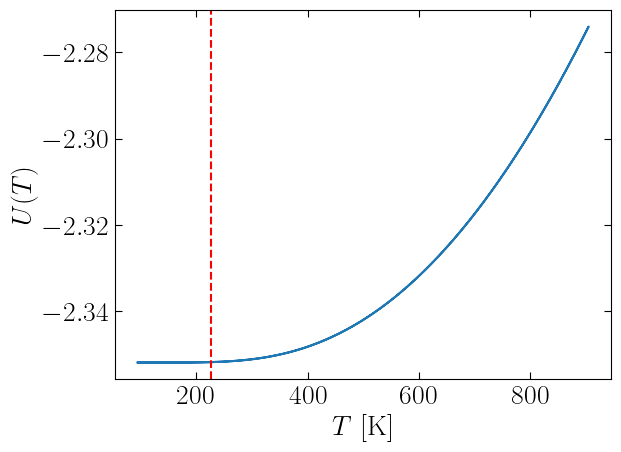

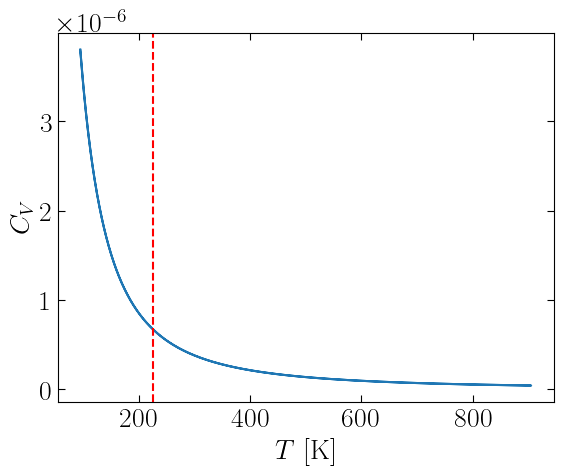

In [5]:
path = 'H2/P_T.csv'
data = np.loadtxt(path, delimiter=',')

E_cucu = -0.436
E_znzn = -0.113
E_cuzn = -0.294
delta_E = E_cucu + E_znzn - 2*E_cuzn
T_c = 0.5*delta_E/k_B

# plt.plot(data[:,1],abs(data[:,0]))
# plt.axvline(x=T_c, color='r', linestyle='--')
# plt.xlabel('$T$ [K]')
# plt.ylabel('$P$')

u_T = 2*(E_cucu + E_znzn + 2*E_cuzn)*np.ones(len(data[:,1])) - 2*data[:,0]**2*delta_E
plt.figure()
plt.plot(data[:,1],u_T)
plt.axvline(x=T_c, color='r', linestyle='--')
plt.xlabel('$T$ [K]')
plt.ylabel('$U(T)$')

u_fluct = np.mean(u_T**2) - np.mean(u_T)**2
c_V = u_fluct / (k_B * data[:,1]**2)
plt.figure()
plt.plot(data[:,1],c_V)
plt.axvline(x=T_c, color='r', linestyle='--')
plt.xlabel('$T$ [K]')
plt.ylabel('$C_V$')

plt.show()